# Entree Task: Implementing Your Own Neural Networks from Scratch

In [1]:
import math
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [2]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        self.stored_X = X
        Y=np.matmul(X,self.W)
        if any(any(ele== -1*float("inf") for ele in row) for row in Y) :
            print(X)
            print(self.W)
        return Y
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        dw = self.stored_X.T
        self.W_grad = np.matmul(dw, Y_grad)
        dx = self.W.T
        grad=np.matmul(Y_grad,dx)
        return grad
        ##########  Code end   ##########

## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [3]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[-0.61118885  0.31227753  1.02611295]]
Numerical gradient: [[-0.61118885  0.31227753  1.02611295]]
Error:  2.3782698033159022e-11
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [4]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        self.stored_X=X
        Y = np.zeros(X.shape)
        for i in range(0, X.shape[0]):
            for j in range(0,X.shape[1]):
                Y[i,j]= max(0,X[i,j])
        return Y
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########
        dx = np.zeros(self.stored_X.shape)
        for i in range(0, self.stored_X.shape[0]):
            for j in range(0, self.stored_X.shape[1]):
                dx[i,j] = (0 if self.stored_X[i,j]<=0 else Y_grad[i,j])
        return dx
        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [5]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.09557169 0.16208119 0.70905418]]
Numerical gradient: [[0.09557169 0.16208119 0.70905418]]
Error:  1.8713378069357134e-11
Correct backward. Congratulations!


## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [6]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
        
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########
        self.stored_diff = prediction-groundtruth
        N = self.stored_diff.size
        loss = 0
        for element in self.stored_diff:
            loss +=element
        loss= pow(loss,2)
        return loss/N
        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        dL = np.zeros(self.stored_diff.shape)
        N = self.stored_diff.size
        for i in range(0,self.stored_diff.shape[0]):
            for j in range(0, self.stored_diff.shape[1]):
                dL[i,j]+=2*(self.stored_diff[i,j])/N
        return dL
        ##########  Code end   ##########

In [7]:
## Dessert stuff.

# A weighted non-linear function: was interested to see how this would work in a neural network.
class QuadraticLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        self.stored_X = X
        Y=np.matmul(np.square(X),self.W)
        return Y
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        dw = np.square(self.stored_X.T)
        self.W_grad = np.matmul(dw, Y_grad)
        dx = self.W.T
        grad=np.matmul(Y_grad,dx)
        grad=2*np.multiply(self.stored_X,grad)
        return grad
        ##########  Code end   ##########

# Leaky ReLU / PReLU function: a piecewise activation function that's an alternative to ReLU
# function and forward/backward equations sourced from https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
class PReLU:
    def __init__(self, alpha = 0.01):
        self.stored_X = None # Here we should store the input matrix X for Backward
        # alpha is the coefficient by which values under 0 will be multiplied
        self.alpha = alpha

    def forward(self, X):
        ########## Code start  ##########
        self.stored_X=X
        Y = np.zeros(X.shape)
        for i in range(0, X.shape[0]):
            for j in range(0,X.shape[1]):
                Y[i,j] = X[i,j]*self.alpha if X[i,j] < 0 else X[i,j]
                if Y[i,j] == -1*float("inf"):
                    print(Y[i,j],X[i,j])
                    raise ValueError("Can't be inf")
        return Y
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
        /*
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         */
        '''
        
        ########## Code start  ##########
        dx = np.zeros(self.stored_X.shape)
        for i in range(0, self.stored_X.shape[0]):
            for j in range(0, self.stored_X.shape[1]):
                dx[i,j] = (self.alpha*Y_grad[i,j] if self.stored_X[i,j]<0 else Y_grad[i,j])
        return dx
        ##########  Code end   ##########

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [8]:
class Network:
    def __init__(self, layers_arch):
        '''
        /*  TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
        self.layers = []
        for layer_arr in layers_arch:
          if layer_arr[0] == 'Linear':
            self.layers.append(LinearLayer(layer_arr[1][0], layer_arr[1][1]))
          elif layer_arr[0] == 'ReLU':
            self.layers.append(ReLU())
          elif layer_arr[0] == 'PReLU':
            self.layers.append(PReLU())
          elif layer_arr[0] == "Quadratic":
            self.layers.append(QuadraticLayer(layer_arr[1][0], layer_arr[1][1]))
        # self.layers.append(MSELoss())

        # self.loss=None
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        ########## Code start  ##########
        # print("forward")
        for layer in self.layers:
          # print(layer)
          X=layer.forward(X)
        return X
        ##########  Code end   ##########

    def backward(self, Y_grad):
        ########## Code start  ##########
        for layer in self.layers[::-1]:
          Y_grad = layer.backward(Y_grad)
        return Y_grad
        ##########  Code end   ##########

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [9]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)


In [10]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

Epoch:  1 / 200  | Train loss:  [241.5838594]  | Test loss :  [873.72496875]
Epoch:  2 / 200  | Train loss:  [106.08954408]  | Test loss :  [413.00023194]
Epoch:  3 / 200  | Train loss:  [50.02816948]  | Test loss :  [201.61447289]
Epoch:  4 / 200  | Train loss:  [24.97782898]  | Test loss :  [104.86340482]
Epoch:  5 / 200  | Train loss:  [12.88954162]  | Test loss :  [55.66033602]
Epoch:  6 / 200  | Train loss:  [6.86764366]  | Test loss :  [31.15883569]
Epoch:  7 / 200  | Train loss:  [3.91154077]  | Test loss :  [18.94915271]
Epoch:  8 / 200  | Train loss:  [2.44962387]  | Test loss :  [12.73216283]
Epoch:  9 / 200  | Train loss:  [1.70702068]  | Test loss :  [9.45352542]
Epoch:  10 / 200  | Train loss:  [1.31555481]  | Test loss :  [7.66316924]
Epoch:  11 / 200  | Train loss:  [1.10126777]  | Test loss :  [6.65452007]
Epoch:  12 / 200  | Train loss:  [0.98005068]  | Test loss :  [6.06933025]
Epoch:  13 / 200  | Train loss:  [0.90975819]  | Test loss :  [5.72551843]
Epoch:  14 / 200

array([5.20558278])

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [11]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    ########## Code start  ##########
    label_matrix = np.zeros((len(labels),classes))
    for (i, label) in enumerate(labels):
        label_matrix[i,label] = 1
    return label_matrix
    ##########  Code end   ##########

In [12]:
### Do not change the code ###
### visualize the samples 

def visualization(x, y_true, y_pred = None, rows = 2, cols = 5, split = 'train'):
    num_row = rows
    num_col = cols
    images = np.reshape(x, (-1, 28, 28))
    labels_true = y_true
    labels_pred = y_pred
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        if split == 'train':
            ax.set_title('Label: {}'.format(labels_true[i]))
        elif split == 'test':
            col = 'green'
            if labels_pred[i] != labels_true[i]:
                col = 'red'
            ax.set_title('Label: {} vs {}'.format(labels_true[i], labels_pred[i]), color = col)
            
    plt.tight_layout()
    plt.show()

In [13]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10, learning_rate_decrease_start=1, learning_rate_decrease_rate=float('inf'), learning_rate_decrease_percent=0):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        self.loss_arr=[]
        self.acc_arr=[]

        self.learning_rate_decrease_rate= learning_rate_decrease_rate
        self.learning_rate_decrease_percent = learning_rate_decrease_percent
        self.learning_rate_decrease_start = learning_rate_decrease_start


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == "Linear" or self.layers_arch[i][0] == "Quadratic":
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Code end   ##########
        
        return loss / n_loop
    

    def visualize(self):
        score = self.net.forward(self.test_data)
        label_preds = np.argmax(score, axis=1)
        visualization(self.test_data, self.test_labels, label_preds, int(len(label_preds)/ 10), 10, split = 'test')
        
    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuracy = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuracy)
            self.loss_arr.append(sum(loss))
            self.acc_arr.append(accuracy)
            if i>=self.learning_rate_decrease_start and i % self.learning_rate_decrease_rate == 0:
                self.learning_rate *= (1-self.learning_rate_decrease_percent)
                print("new scheduled learning rate", self.learning_rate)
    
    def plot_results(self, title=""):
        epochs=range(1,self.max_epoch+1)
        plt.plot(epochs, self.loss_arr , label="Summed Loss")
        plt.plot(epochs, self.acc_arr, label="Accuracy")
        plt.plot(epochs[-1], self.acc_arr[-1], 'ro')
        plt.annotate(f'Final Accuracy: {self.acc_arr[-1]}', xy =(epochs[-1], self.acc_arr[-1]),
                xytext =(epochs[-1]-1, self.acc_arr[-1]+0.05))
        plt.xticks(range(0,self.max_epoch+1, round(self.max_epoch/10)))
        plt.ylim([0,1])
        plt.xlabel("Step #")
        plt.title(title)
        plt.legend()
        plt.show()
        




## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

Training Basic Model
Epoch:  1 / 100  | Train loss:  [0.06843741 0.3328171  0.02898272 0.04933956 0.09940364 0.0730183
 0.08640317 0.13418933 0.01658333 0.02153099]  | Test Accuracy :  0.415
Epoch:  2 / 100  | Train loss:  [0.01744309 0.02058075 0.00862362 0.00792623 0.03426082 0.01176343
 0.00606545 0.01413045 0.01907214 0.01866021]  | Test Accuracy :  0.56
Epoch:  3 / 100  | Train loss:  [0.01090421 0.01870216 0.00828828 0.00820838 0.02288651 0.01027219
 0.00487252 0.00995865 0.01733913 0.01313806]  | Test Accuracy :  0.655
Epoch:  4 / 100  | Train loss:  [0.00900611 0.01649356 0.00776767 0.00816072 0.01846204 0.00893716
 0.00445635 0.00850893 0.01474981 0.01098339]  | Test Accuracy :  0.69
Epoch:  5 / 100  | Train loss:  [0.00791585 0.01468937 0.00763833 0.0074212  0.01515367 0.00823102
 0.00412153 0.00747809 0.01263302 0.00983615]  | Test Accuracy :  0.705
Epoch:  6 / 100  | Train loss:  [0.00716461 0.01327668 0.00729018 0.007048   0.0131677  0.00781591
 0.00373315 0.00698923 0.011

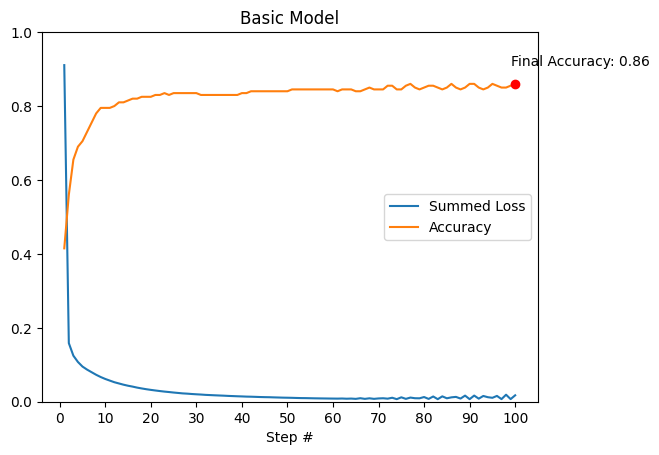

In [14]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
basic_classifier_layers_arch = [['Linear', (28*28, 512)], ["ReLU"], ['Linear', (512, 512)], ["ReLU"], ['Linear', (512, 512)], ["ReLU"], ['Linear', (512, 360)], ["ReLU"], ['Linear', (360, 10)]]
basic_cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = basic_classifier_layers_arch, learning_rate = 0.10, batch_size = 64, max_epoch = 100)
print("Training Basic Model")
basic_cls.Train()
basic_cls.plot_results(title="Basic Model")

Training Basic Scheduled Model
Epoch:  1 / 200  | Train loss:  [0.0766044  0.18848175 0.42437713 0.09767302 0.06318476 0.02875337
 0.43945354 0.50188788 0.60357698 0.06326572]  | Test Accuracy :  0.495
Epoch:  2 / 200  | Train loss:  [0.00351917 0.00877232 0.00795224 0.00692604 0.01162559 0.00687846
 0.00644584 0.01282202 0.00690241 0.00923219]  | Test Accuracy :  0.655
Epoch:  3 / 200  | Train loss:  [0.00293081 0.00732427 0.00776063 0.00560762 0.00864137 0.00523244
 0.00457899 0.01084944 0.00645334 0.00846646]  | Test Accuracy :  0.705
Epoch:  4 / 200  | Train loss:  [0.0028983  0.00642534 0.0074778  0.0047646  0.00701809 0.0040318
 0.00355356 0.00944206 0.00598774 0.00725876]  | Test Accuracy :  0.74
Epoch:  5 / 200  | Train loss:  [0.00279078 0.00602217 0.00665705 0.0040173  0.00599697 0.00358782
 0.00281111 0.00846982 0.00543744 0.00657879]  | Test Accuracy :  0.755
Epoch:  6 / 200  | Train loss:  [0.00285501 0.00532184 0.00600764 0.00375228 0.00502577 0.00341537
 0.00219199 0.007

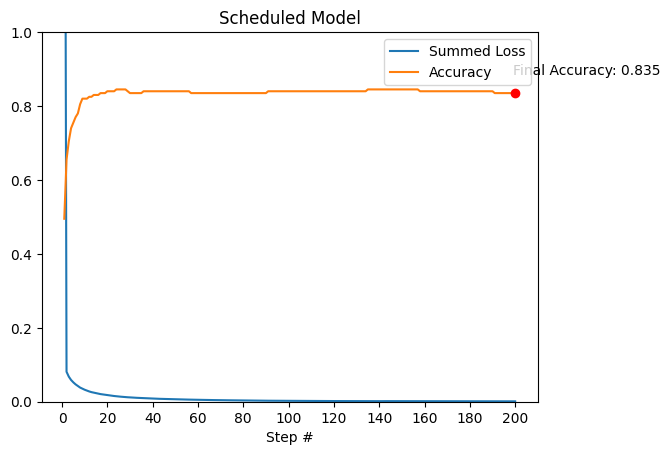

In [15]:
scheduled_classifier_layers_arch = [['Linear', (28*28, 512)], ["ReLU"], ['Linear', (512, 512)], ["ReLU"], ['Linear', (512, 512)], ["ReLU"], ['Linear', (512, 360)], ["ReLU"], ['Linear', (360, 10)]]
scheduled_cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = scheduled_classifier_layers_arch, learning_rate = 0.15, batch_size = 64, max_epoch = 200, learning_rate_decrease_start=100,learning_rate_decrease_rate=20,learning_rate_decrease_percent=0.10)
print("Training Basic Scheduled Model")
scheduled_cls.Train()
scheduled_cls.plot_results(title="Scheduled Model")

Training Double ReLU Model
Epoch:  1 / 100  | Train loss:  [0.05378275 0.30287276 0.00711317 0.40515603 0.16094184 0.02973748
 0.09529748 0.09135442 0.04752263 0.05215826]  | Test Accuracy :  0.435
Epoch:  2 / 100  | Train loss:  [0.00330651 0.01279486 0.00835838 0.01206741 0.02318956 0.01721695
 0.01027373 0.01171863 0.00984537 0.01902176]  | Test Accuracy :  0.55
Epoch:  3 / 100  | Train loss:  [0.00321565 0.01148218 0.00561833 0.00801692 0.01552784 0.01245665
 0.00732258 0.00915012 0.00741846 0.01538395]  | Test Accuracy :  0.61
Epoch:  4 / 100  | Train loss:  [0.0031986  0.00944646 0.00434393 0.00574499 0.01256005 0.01023058
 0.00575563 0.00819699 0.00714711 0.01289752]  | Test Accuracy :  0.635
Epoch:  5 / 100  | Train loss:  [0.00340488 0.00840313 0.00388519 0.00458771 0.01048952 0.00835956
 0.00479118 0.00731528 0.00706854 0.01098791]  | Test Accuracy :  0.655
Epoch:  6 / 100  | Train loss:  [0.00330407 0.00746753 0.00350482 0.00364593 0.00941611 0.00724938
 0.00393924 0.0065416

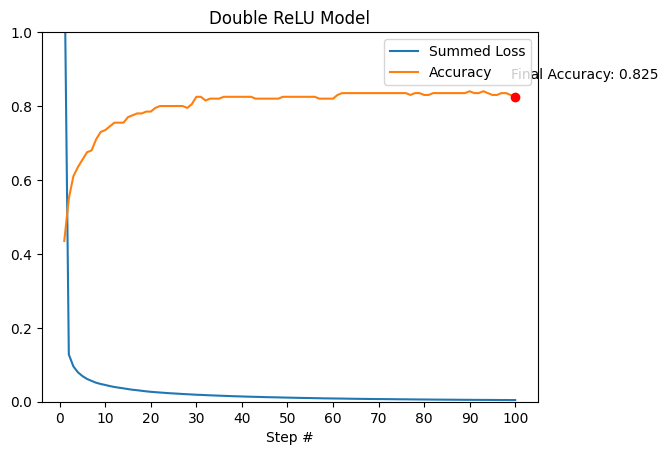

In [16]:
doublerelu_classifier_layers_arch = [['Linear', (28*28, 512)], ["ReLU"], ["ReLU"], ['Linear', (512, 512)], ["ReLU"], ["ReLU"], ['Linear', (512, 512)], ["ReLU"], ["ReLU"], ['Linear', (512, 360)], ["ReLU"], ["ReLU"], ['Linear', (360, 10)]]
doublerelu_cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = doublerelu_classifier_layers_arch, learning_rate = 0.10, batch_size = 64, max_epoch = 100)
print("Training Double ReLU Model")
doublerelu_cls.Train()
doublerelu_cls.plot_results(title="Double ReLU Model")

Training PReLU model
Epoch:  1 / 100  | Train loss:  [0.05247885 0.15147007 0.20225732 0.21844101 0.17207165 0.21145216
 0.05590367 0.20231791 0.16074363 0.0952518 ]  | Test Accuracy :  0.515
Epoch:  2 / 100  | Train loss:  [0.01139552 0.01590742 0.00936201 0.00681705 0.02221734 0.00898619
 0.00690653 0.01537892 0.00875308 0.01163663]  | Test Accuracy :  0.62
Epoch:  3 / 100  | Train loss:  [0.00798192 0.01290622 0.00704889 0.00506865 0.01602559 0.00777125
 0.00557282 0.01208587 0.0081805  0.01032761]  | Test Accuracy :  0.705
Epoch:  4 / 100  | Train loss:  [0.0065054  0.01055133 0.00583606 0.00400578 0.01254518 0.00690553
 0.00461901 0.01006359 0.00794763 0.0093333 ]  | Test Accuracy :  0.735
Epoch:  5 / 100  | Train loss:  [0.0055521  0.00883485 0.00523376 0.00342103 0.01041    0.00666413
 0.003998   0.00885777 0.00711724 0.0085887 ]  | Test Accuracy :  0.76
Epoch:  6 / 100  | Train loss:  [0.00496454 0.00770474 0.00478118 0.00293243 0.00867037 0.00647285
 0.00357028 0.00819416 0.00

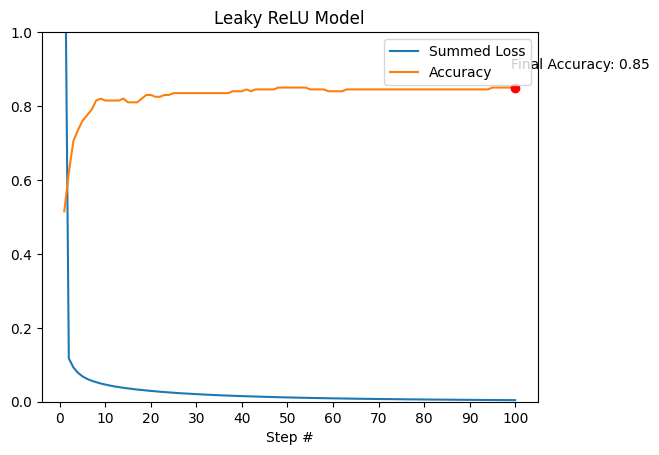

In [17]:
prelu_classifier_layers_arch= [['Linear', (28*28, 512)], ["PReLU"], ['Linear', (512, 512)], ["PReLU"], ['Linear', (512, 512)], ["PReLU"], ['Linear', (512, 360)], ["PReLU"], ['Linear', (360, 10)]]
prelu_cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = prelu_classifier_layers_arch, learning_rate = 0.10, batch_size = 64, max_epoch = 100)
print("Training PReLU model")
prelu_cls.Train()
prelu_cls.plot_results(title="Leaky ReLU Model")

Training Double PReLU model
Epoch:  1 / 100  | Train loss:  [0.02102624 0.17013344 0.02517976 0.03426246 0.0469612  0.0705868
 0.10423015 0.11478286 0.15160844 0.3493721 ]  | Test Accuracy :  0.445
Epoch:  2 / 100  | Train loss:  [0.00277376 0.01104168 0.00611925 0.01485541 0.0209364  0.02670248
 0.00599609 0.01482386 0.00726813 0.01071155]  | Test Accuracy :  0.585
Epoch:  3 / 100  | Train loss:  [0.00188538 0.00905632 0.00552176 0.01156829 0.01590404 0.01705234
 0.00536061 0.01250864 0.00536454 0.00755362]  | Test Accuracy :  0.65
Epoch:  4 / 100  | Train loss:  [0.00153361 0.00789924 0.00497167 0.00936376 0.01394419 0.01313679
 0.00449787 0.01097439 0.00450323 0.00540478]  | Test Accuracy :  0.69
Epoch:  5 / 100  | Train loss:  [0.00145424 0.00679992 0.0042502  0.00760689 0.01230816 0.01095973
 0.0039445  0.00979006 0.00397115 0.00417175]  | Test Accuracy :  0.74
Epoch:  6 / 100  | Train loss:  [0.00139403 0.00602454 0.00377183 0.00647541 0.01079617 0.00952977
 0.0034929  0.00865416

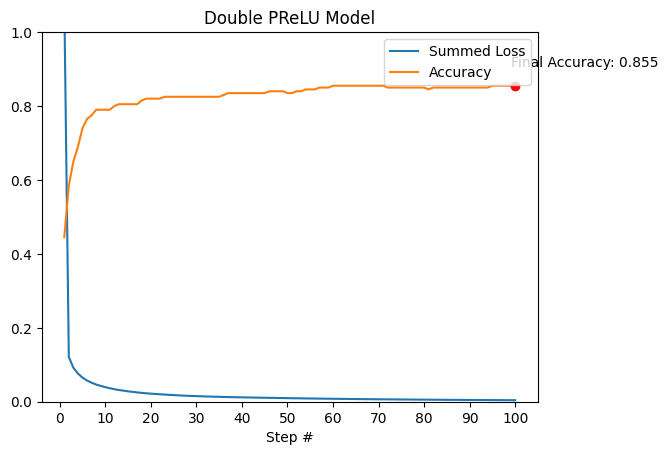

In [21]:
double_prelu_classifier_layers_arch= [['Linear', (28*28, 512)],  ["PReLU"], ["PReLU"], ['Linear', (512, 512)],  ["PReLU"], ["PReLU"], ['Linear', (512, 512)],  ["PReLU"], ["PReLU"], ['Linear', (512, 360)],  ["PReLU"], ["PReLU"], ['Linear', (360, 10)]]
double_prelu_cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = prelu_classifier_layers_arch, learning_rate = 0.10, batch_size = 64, max_epoch = 100)
print("Training Double PReLU model")
double_prelu_cls.Train()
double_prelu_cls.plot_results(title="Double PReLU Model")

Training Quadratic Model
Epoch:  1 / 100  | Train loss:  [0.07129862 0.09404264 0.07499364 0.07440604 0.10078329 0.05503576
 0.03516333 0.0748712  0.09816618 0.05027713]  | Test Accuracy :  0.13
Epoch:  2 / 100  | Train loss:  [0.04527958 0.10378806 0.07053781 0.05589992 0.07764237 0.04499343
 0.02292739 0.06439352 0.05177494 0.04950116]  | Test Accuracy :  0.14
Epoch:  3 / 100  | Train loss:  [0.03780915 0.10552633 0.06027336 0.04903445 0.07111954 0.04057423
 0.01909412 0.05972338 0.04173667 0.0456141 ]  | Test Accuracy :  0.16
Epoch:  4 / 100  | Train loss:  [0.03332986 0.10685138 0.05278183 0.0451736  0.06599954 0.03721967
 0.01673199 0.05704412 0.03523616 0.04323335]  | Test Accuracy :  0.175
Epoch:  5 / 100  | Train loss:  [0.03042591 0.10806812 0.04671315 0.04277804 0.06186209 0.03474824
 0.01523127 0.0552846  0.03074997 0.04137599]  | Test Accuracy :  0.185
Epoch:  6 / 100  | Train loss:  [0.02853121 0.10889625 0.04174083 0.04123553 0.05837111 0.03293244
 0.0142981  0.05381222 0

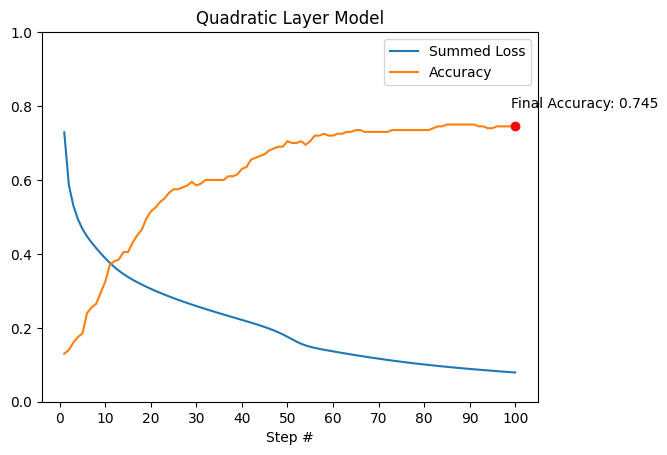

In [19]:
quadratic_classifier_layers_arch= [ ['Quadratic', (28*28, 512)], ["ReLU"],  ['Quadratic', (512, 512)],  ["ReLU"], ['Quadratic', (512, 360)], ["ReLU"], ['Quadratic', (360, 10)]]
quadratic_cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch =quadratic_classifier_layers_arch, learning_rate = 0.10, batch_size = 64, max_epoch = 100)
print("Training Quadratic Model")
quadratic_cls.Train()
quadratic_cls.plot_results(title="Quadratic Layer Model")

Training Dense Model
Epoch:  1 / 200  | Train loss:  [ 0.09535751 12.45477233  0.95925534  1.22617731  1.73348718  1.2690399
 10.58813759  4.56717864  4.04412606  4.09017433]  | Test Accuracy :  0.41
Epoch:  2 / 200  | Train loss:  [0.00891172 0.01490403 0.01010099 0.01694147 0.02465988 0.01667397
 0.00608618 0.01289184 0.01739729 0.01427307]  | Test Accuracy :  0.615
Epoch:  3 / 200  | Train loss:  [0.00605281 0.01019549 0.00926649 0.01828853 0.02857319 0.01623683
 0.00274843 0.01055089 0.02176845 0.01769943]  | Test Accuracy :  0.665
Epoch:  4 / 200  | Train loss:  [0.00508486 0.071058   0.01618677 0.05144963 0.04524294 0.02349905
 0.02835715 0.01814068 0.06294994 0.0341045 ]  | Test Accuracy :  0.67
Epoch:  5 / 200  | Train loss:  [0.00619711 0.07089808 0.01278541 0.02844696 0.02076082 0.01814362
 0.02348263 0.00872289 0.02151739 0.01131359]  | Test Accuracy :  0.675
Epoch:  6 / 200  | Train loss:  [0.00521129 0.12880383 0.01595088 0.01827423 0.01052543 0.01283163
 0.08578873 0.0117

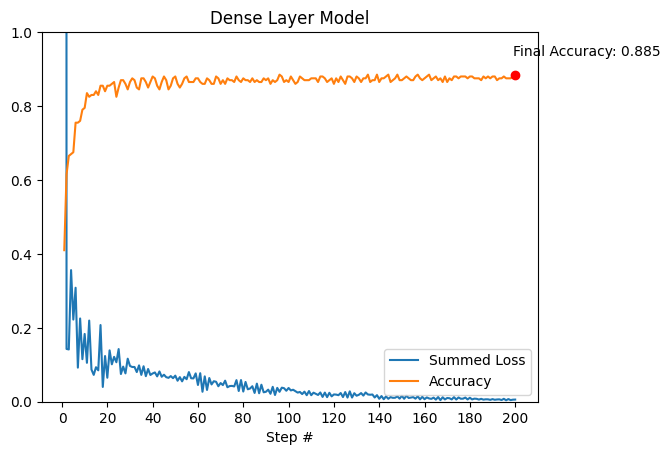

In [38]:
# due to the sheer number of nodes and the large numbers sometimes generated by the kaiming initialization, running this section sometimes causes an overflow error.
# in case of such an overflow error, just re-run this block of code
dense_classifier_layers_arch = [['Linear', (28*28, 2048)], ["ReLU"], ['Linear', (2048, 2048)], ["ReLU"], ['Linear', (2048, 2048)], ["ReLU"], ['Linear', (2048, 2048)], ["ReLU"], ['Linear', (2048, 2048)], ["ReLU"], ['Linear', (2048, 10)]]
dense_cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = dense_classifier_layers_arch, learning_rate = 0.1, batch_size = 64, max_epoch = 200)
print("Training Dense Model")
dense_cls.Train()
dense_cls.plot_results(title="Dense Layer Model")

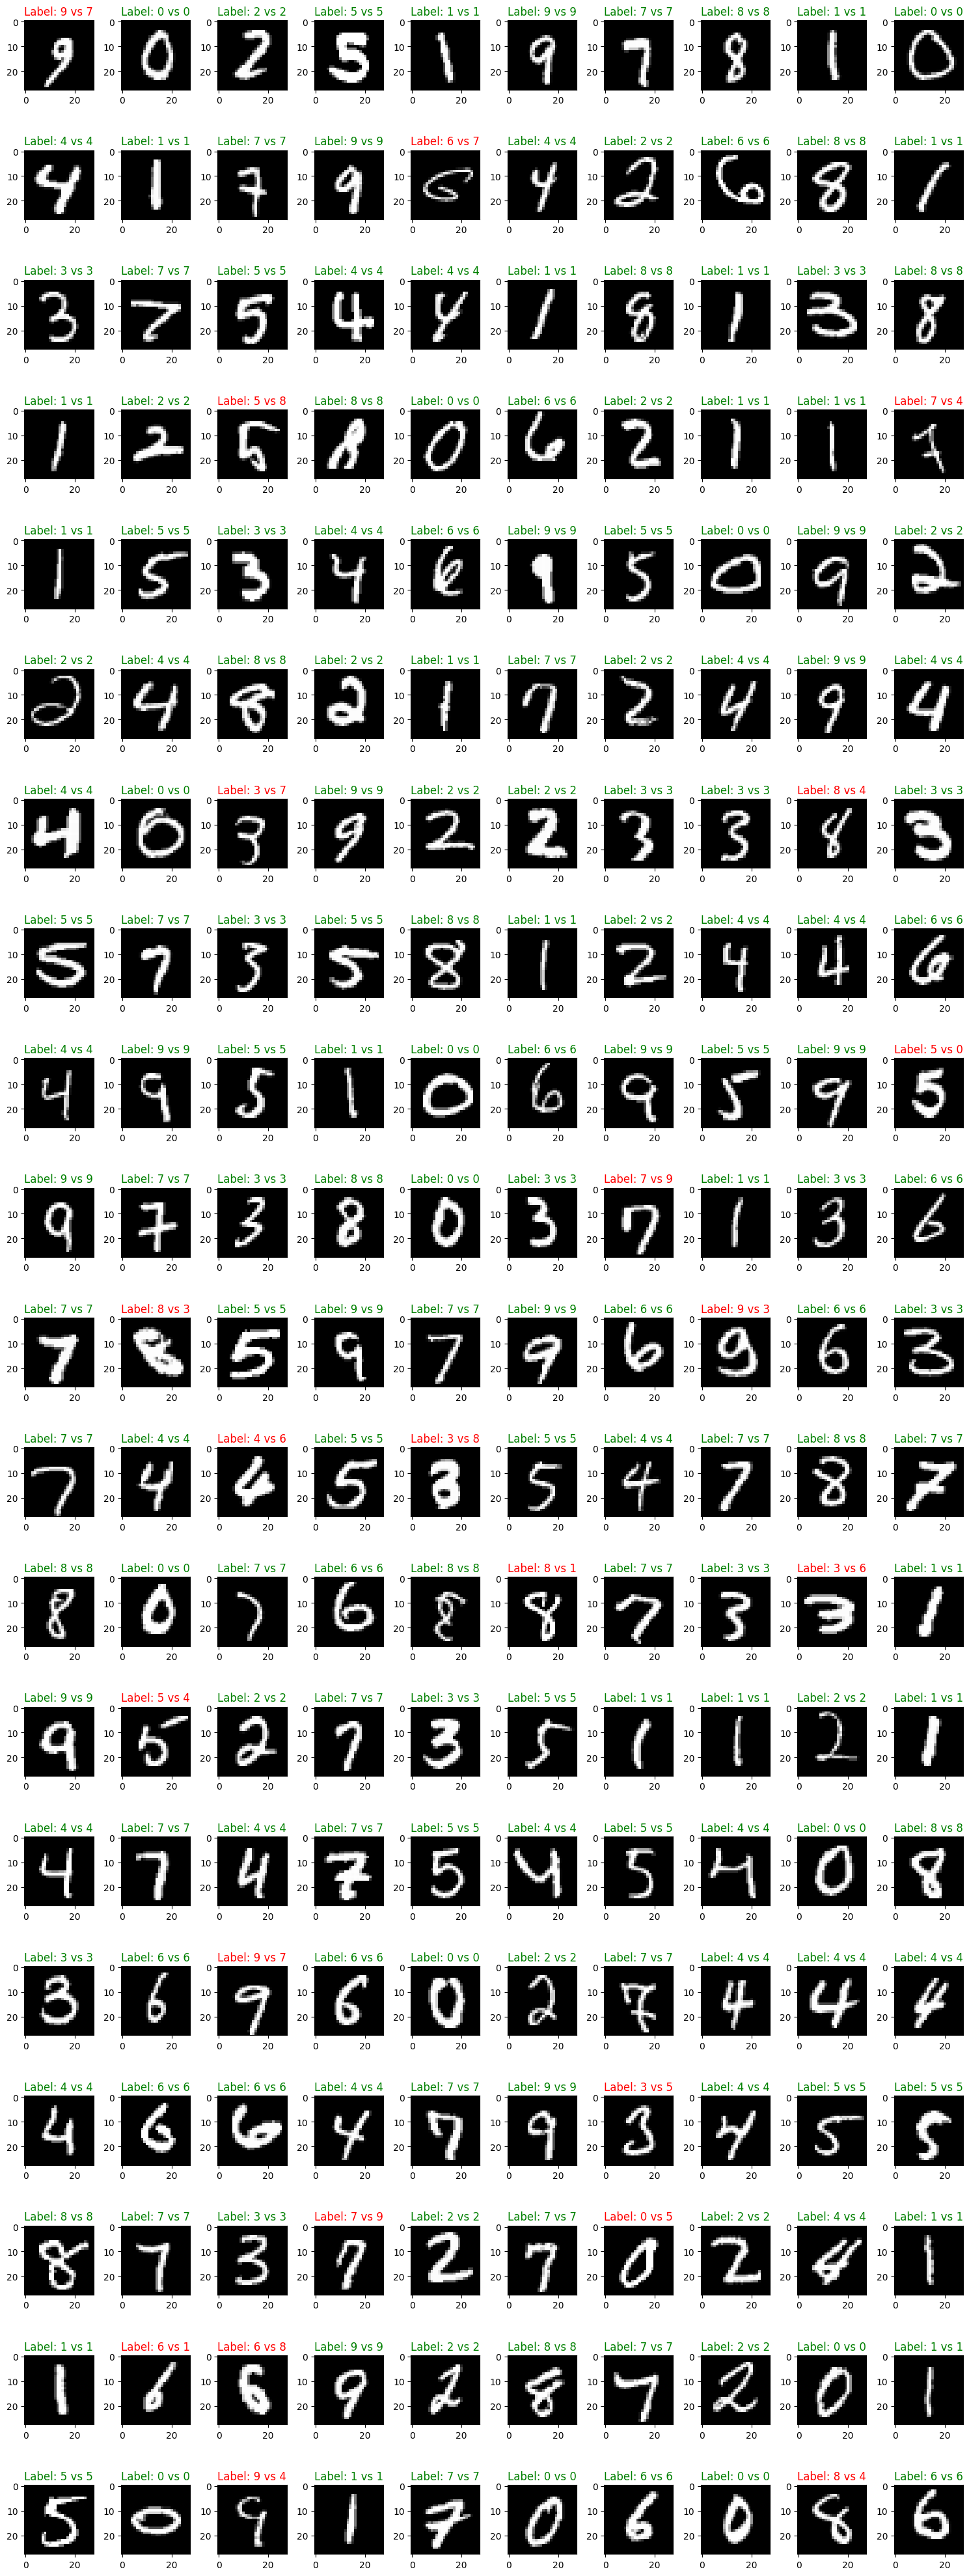

In [39]:
# visualize the result
dense_cls.visualize()

In [40]:
# print prediction accuracy
dense_cls.Test()

0.885